In [25]:
# import required libraries 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import keras
import matplotlib.pyplot as plt

In [28]:
# loading training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        'C:\\Users\\Chiranth SB\\Desktop\\Dl - exam\\DL Paper 1\\Datasets\\CNN\\Shoe Classification\\train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 662 images belonging to 3 classes.


In [29]:
train_generator.class_indices

{'Boots': 0, 'Sandals': 1, 'Slippers': 2}

In [96]:
# loading testing data
validation = train_datagen.flow_from_directory(
        'C:\\Users\\Chiranth SB\\Desktop\\Dl - exam\\DL Paper 1\\Datasets\\CNN\\Shoe Classification\\validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 116 images belonging to 3 classes.


In [94]:
# initialising sequential model and adding layers to it
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(128, activation='relu'))
cnn.add(keras.layers.Dense(64, activation='relu'))
cnn.add(keras.layers.Dense(3, activation='softmax'))

In [95]:
# model architecture summary
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 48)        1344      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 48)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 48)        20784     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 48)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 32)        13856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)             

In [98]:
# finally compile and train the cnn
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [99]:
# fitting train data to model
hist = cnn.fit(x=train_generator, validation_data=validation, epochs=15)

Epoch 1/15
21/21 [==============================] - 11s 546ms/step - loss: 0.9800 - accuracy: 0.5196 - val_loss: 0.7779 - val_accuracy: 0.7328
Epoch 2/15
21/21 [==============================] - 11s 515ms/step - loss: 0.6377 - accuracy: 0.7326 - val_loss: 0.5227 - val_accuracy: 0.7931
Epoch 3/15
21/21 [==============================] - 11s 508ms/step - loss: 0.4423 - accuracy: 0.8021 - val_loss: 0.3416 - val_accuracy: 0.8276
Epoch 4/15
21/21 [==============================] - 11s 510ms/step - loss: 0.3580 - accuracy: 0.8489 - val_loss: 0.4523 - val_accuracy: 0.8534
Epoch 5/15
21/21 [==============================] - 11s 505ms/step - loss: 0.3322 - accuracy: 0.8776 - val_loss: 0.3170 - val_accuracy: 0.8448
Epoch 6/15
21/21 [==============================] - 11s 533ms/step - loss: 0.2734 - accuracy: 0.9018 - val_loss: 0.3737 - val_accuracy: 0.8103
Epoch 7/15
21/21 [==============================] - 11s 516ms/step - loss: 0.2393 - accuracy: 0.8973 - val_loss: 0.4267 - val_accuracy: 0.8362

# we have a accuracy of 95.47 % with 3 dense layers and 15 epochs.

In [100]:
# collecting history of epoch in variable aa
aa = hist.history

In [153]:
aa.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

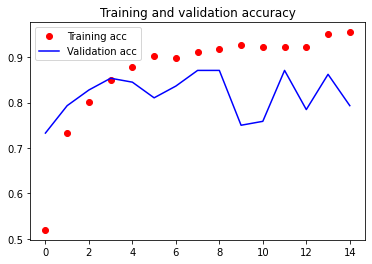

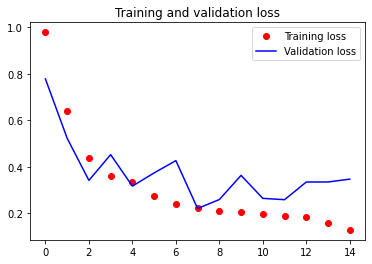

In [102]:
# PLOTTING THE LOSS AND ACCURACY

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [103]:
train_generator.class_indices

{'Boots': 0, 'Sandals': 1, 'Slippers': 2}

In [104]:
from keras.preprocessing import image

In [105]:
# testing the model
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    result = np.argmax(result)
    if result == 0:
        print('Boots')
    elif result == 1:
        print('Sandals')
    else:
        print('Slippers')

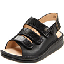

In [106]:
# testing test image 
new_image = image.load_img('image (1).jpg',target_size=(64,64))
new_image

In [107]:
testing_image('image (1).jpg')

Sandals


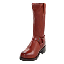

In [108]:
# testing test image 
new_image_1 = image.load_img('image (2).jpg',target_size=(64,64))
new_image_1

In [109]:
testing_image('image (2).jpg')

Boots


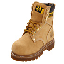

In [110]:
# testing test image 
new_image_2 = image.load_img('image (13).jpg',target_size=(64,64))
new_image_2

In [111]:
testing_image('image (13).jpg')

Boots


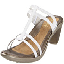

In [112]:
# testing test image 
new_image_3 = image.load_img('image (66).jpg',target_size=(64,64))
new_image_3

In [113]:
testing_image('image (66).jpg')

Sandals


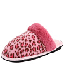

In [114]:
# testing test image 
new_image_4 = image.load_img('image (69).jpg',target_size=(64,64))
new_image_4

In [115]:
testing_image('image (69).jpg')

Slippers


In [124]:
import os
path = 'C:\\Users\\Chiranth SB\\Desktop\\Dl - exam\\DL Paper 1\\Datasets\\CNN\\Shoe Classification\\test_msin'

In [147]:
print('For predicting we have :',len(os.listdir(directory)))

For predicting we have : 89


In [150]:
test_img = []
for i in os.listdir(directory):
    test_img.append(i)

In [155]:
print('Following are the results for the test data set : ')
for filename in os.listdir(directory):
    testing_image(path+'\\'+filename)

Following are the results for the test data set : 
Sandals
Boots
Boots
Slippers
Boots
Slippers
Boots
Sandals
Sandals
Boots
Boots
Boots
Boots
Boots
Boots
Boots
Sandals
Sandals
Sandals
Sandals
Sandals
Sandals
Boots
Sandals
Boots
Boots
Boots
Boots
Slippers
Slippers
Boots
Boots
Boots
Boots
Boots
Boots
Boots
Boots
Boots
Boots
Boots
Boots
Boots
Slippers
Sandals
Sandals
Slippers
Slippers
Sandals
Sandals
Slippers
Sandals
Sandals
Slippers
Slippers
Boots
Slippers
Slippers
Slippers
Slippers
Sandals
Sandals
Sandals
Sandals
Slippers
Slippers
Boots
Slippers
Slippers
Slippers
Slippers
Slippers
Slippers
Slippers
Slippers
Slippers
Slippers
Slippers
Slippers
Slippers
Slippers
Sandals
Slippers
Slippers
Sandals
Sandals
Sandals
Slippers
Slippers
